# Instrumental variables

## Functions and Loops

Go back to the first notebook. Learn how to write functions and loops.

Lists and tuples

In [6]:
l1 = [0,1,2,3,"let's start"] # a list: a mutable, ordered collection
l1

[0, 1, 2, 3, "let's start"]

In [7]:
l1[1] = 34

In [8]:
l1

[0, 34, 2, 3, "let's start"]

In [9]:
t = (0,1,2,3,"let's start") # a list: an immutable, ordered collection
t

(0, 1, 2, 3, "let's start")

In [10]:
t[1] = 34

TypeError: 'tuple' object does not support item assignment

In [13]:
for i in t:                # blocks start with colon
    # content of the loop  # block is *indented*
    print(i)
    print("H")

0
H
1
H
2
H
3
H
let's start
H


In [16]:
for i in t:                # blocks start with colon
    # content of the loop  # block is *indented*
    print(i)
print("H")                 # statement is unindented

0
1
2
3
let's start
H


In [18]:
# you can stop a loop before the end:
for i in range(0,10):
    if (i>=5):   # blocks after conditional statements must also be indented
        break
    print(i)

0
1
2
3
4


In [ ]:
# conditional statements
if 2<1:
    print("I'll pay you")
else:
    print("Were good")

In [20]:
# while loop
t = 0
while (t<100):
    t = t**2 + 1
    print(t)

1
2
5
26
677


functions

In [25]:
from matplotlib import pyplot as plt
import numpy as np


Text(0.5, 1.0, 'sin(2x)')

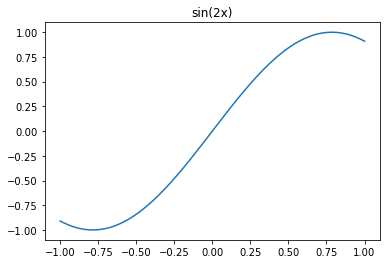

In [29]:
x = np.linspace(-1,1,100)
y = np.sin(x*2)
plt.plot(x,y)
plt.title("sin(2x)")

Text(0.5, 1.0, 'sin(3x)')

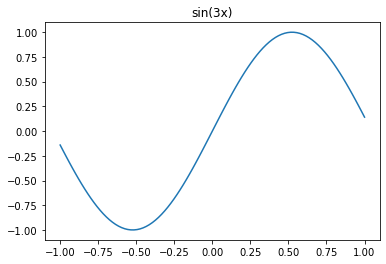

In [30]:
x = np.linspace(-1,1,100)
y = np.sin(x*3)
plt.plot(x,y)
plt.title("sin(3x)")

Text(0.5, 1.0, 'sin(4x)')

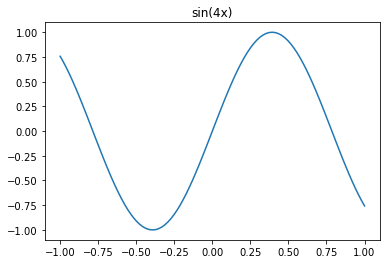

In [31]:
x = np.linspace(-1,1,100)
y = np.sin(x*4)
plt.plot(x,y)
plt.title("sin(4x)")

In [40]:
def make_sin(k):
    x = np.linspace(-1,1,100)
    y = np.sin(x*k)
    plt.plot(x,y,label=f"sin({k}x)")

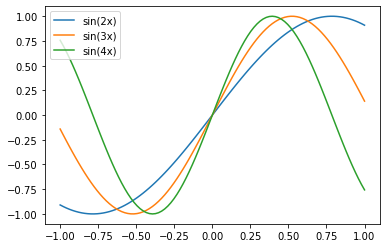

In [41]:
make_sin(2)
make_sin(3)
make_sin(4)
plt.legend()

In [42]:
def make_sin(k):
    """Plots sin(k x)
    k: value of k
    """
    x = np.linspace(-1,1,100) # comments
    y = np.sin(x*k)
    plt.plot(x,y,label=f"sin({k}x)")

In [43]:
make_sin?

Signature: make_sin(k)
Docstring:
Plots sin(k x)
k: value of k
File:      ~/Teaching/dbe/Session_6/<ipython-input-42-a6bb8432d09a>
Type:      function


In [46]:
def make_sin_2(k, l): # several arguments separated by comma
    """Plots sin(k x)
    k: value of k
    """
    x = np.linspace(-1,1,100) # comments
    y = np.sin((x-l)*k)
    plt.plot(x,y,label=f"sin({k}x)")

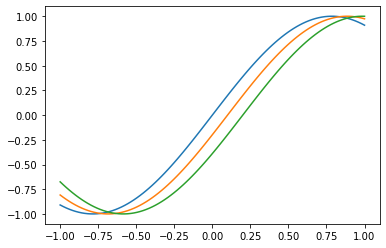

In [47]:
make_sin_2(2,0)
make_sin_2(2,0.1)
make_sin_2(2,0.2)

In [53]:
def make_sin_3(k, l=0, grid=True): # several arguments separated by comma
    """Plots sin(k x)
    k: value of k
    """
    x = np.linspace(-1,1,100) # comments
    y = np.sin((x-l)*k)
    plt.plot(x,y,label=f"sin({k}x)")
    plt.grid(grid)

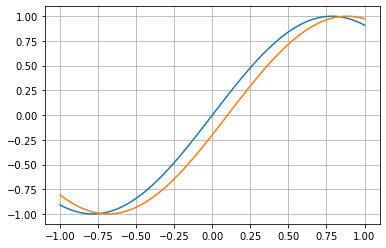

In [54]:
make_sin_3(2)
make_sin_3(2, l=0.1)

In [65]:
def fobj(k):
    return k**2+1

In [66]:
fobj  # fobj is a "function object"

<function __main__.fobj(k)>

In [67]:
fobj(3)  # it can be called with parenthesess

10

In [69]:
# functions can be passed as arguments
def compute_several_times(ppp, k):
    for i in range(k):
        print(ppp(i))
        


In [70]:
compute_several_times(fobj, 3)

1
2
5


## Baby example on mock dataset

### Constructing the dataset

Create four random series of length $N=1000$

- $x$: education
- $y$: salary
- $z$: ambition
- $q$: early smoking 

such that:

1. $x$ and $z$ cause $y$
2. $z$ causes $x$
3. $q$ is correlated with $x$, not with $z$

(all relations are linear, add random shocks where needed)

Create a dataset `df`


### Naive approach

Run a regression to estimate the effect of $x$ on $y$. Control by $z$.
What happens ?

### Instrumental variable

Use $q$ to instrument the effect of x on y. Comment.

## Return on Education

We follow the excellent R [tutorial](https://www.econometrics-with-r.org/12-6-exercises-10.html) from the (excellent) *Econometrics with R* book.

The goal is to measure the effect of schooling on earnings, while correcting the endogeneity bias by using distance to college as an instrument.

__Download the college distance and make a nice dataframe. Discribe the dataset. Plot an histogram of distance.__

https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [1]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/AER/CollegeDistance.csv"
import pandas as pd

In [2]:
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
0,1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
1,2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
2,3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


In [4]:
df.describe()

,Unnamed: 0,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,3954.638953,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,5953.827761,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,1.000000,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,1185.500000,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,2370.000000,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,3554.500000,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,37810.000000,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


In [5]:
from matplotlib import pyplot as plt
import numpy as np

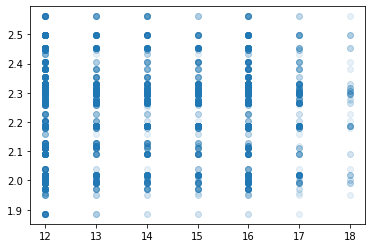

In [6]:
plt.plot(df['education'], np.log(df['wage']), 'o', alpha=0.1)

In [7]:
df[['education','wage']].corr()

,education,wage
education,1.000000,0.023858
wage,0.023858,1.000000


Plot the histogram of distance:

(array([3241.,  831.,  399.,  156.,   45.,   17.,   10.,   19.,   17.,
           4.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

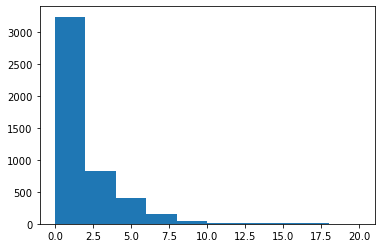

In [9]:
plt.hist(df['distance'])

__Run the naive regression $\log(\text{wage})=\beta_0 + \beta_1 \text{education} + u$__



In [22]:
# with statsmodels
from statsmodels.formula import api
from numpy import log

In [26]:
model_0 = api.ols("log(wage) ~ education", data=df)

In [27]:
res_0 = model_0.fit()

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log(wage)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.016
Date:                Tue, 09 Mar 2021   Prob (F-statistic):             0.0825
Time:                        09:17:19   Log-Likelihood:                 2475.7
No. Observations:                4739   AIC:                            -4947.
Df Residuals:                    4737   BIC:                            -4935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2132      0.016    136.379      0.000       2.181       2.245
education      0.0020      0.001      1.737      0.082      -0.000       0.004
==============================================================================
Omnibus:                       98.828   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.887
Skew:                          -0.252   Prob(JB):                     1.65e-18
Kurtosis:                       2.599   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Augment the regression with `unemp`, `hispanic`, `af-am`, `female` and `urban`__

In [31]:
df.head() # hisanic, af-am are not in the dataframe

,Unnamed: 0,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
0,1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
1,2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
2,3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


In [33]:
df['ethnicity'].unique()

array(['other', 'afam', 'hispanic'], dtype=object)

In [46]:
model_1 = api.ols("log(wage) ~ education + unemp + C(ethnicity, Treatment('other')) + C(gender, Treatment('male')) + urban", data=df)

In [47]:
res_1 = model_1.fit()

In [48]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log(wage)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     90.20
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          1.61e-107
Time:                        09:24:04   Log-Likelihood:                 2730.8
No. Observations:                4739   AIC:                            -5448.
Df Residuals:                    4732   BIC:                            -5402.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.1520      0.017    127.706      0.000       2.119       2.185
C(ethnicity, Treatment('other'))[T.afam]        -0.0619      0.006    -11.058      0.000      -0.073      -0.051
C(ethnicity, Treatment('other'))[T.hispanic]    -0.0535      0.005    -10.246      0.000      -0.064      -0.043
C(gender, Treatment('male'))[T.female]          -0.0091      0.004     -2.291      0.022      -0.017      -0.001
urban[T.yes]                                     0.0089      0.005      1.862      0.063      -0.000       0.018
education                                        0.0007      0.001      0.605      0.546      -0.002       0.003
unemp                                            0.0136      0.001     18.874      0.000       0.012       0.015
==============================================================================
Omnibus:                      154.444   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.059
Skew:                          -0.342   Prob(JB):                     2.11e-29
Kurtosis:                       2.552   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Comment the results and explain the selection problem__

There is a selection bias. The same subjects, might have higer salaries and stay longer at school, because:
- they are more productive (smarter)
- their parents might be wealthy and pay for private education

__Explain why distance to college might be used to instrument the effect of schooling.__

Remember the instrument needs to be correlated with the explanatory variable and independent from the residual (and the explained variable).

1/ distance creates a cost to attend school, which increases the incentive to drop out earlier
2/ it is not directly correlated with salary except through the effect of school attendance

* actually, school distance might be correlated with social background




__Run an IV regression, where `distance` is used to instrument schooling.__

look at: 
    https://bashtage.github.io/linearmodels/
   (two-stage least squares)

In [26]:
import numpy as np
from linearmodels.iv import IV2SLS

model_3 = IV2SLS.from_formula('np.log(wage) ~  1 + [education ~ distance]', df)


In [24]:
res_3 = model_3.fit()

In [25]:
res_3.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                      0.9789
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9789
No. Observations:                4739   F-statistic:                 1.012e+05
Date:                Tue, Mar 09 2021   P-value (F-stat)                0.0000
Time:                        09:47:58   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
education      0.1648     0.0005     318.16     0.0000      0.1638      0.1658
==============================================================================

Endogenous: education
Instruments: distance
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [31]:
formula = "np.log(wage) ~ 1 + [education ~ distance] + unemp + C(ethnicity, Treatment('other')) + C(gender, Treatment('male')) + urban"

model_4 = IV2SLS.from_formula(formula, df)


In [33]:
res_4 = model_4.fit()

In [35]:
res_4.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                     -0.5786
Estimator:                    IV-2SLS   Adj. R-squared:                -0.5806
No. Observations:                4739   F-statistic:                    335.08
Date:                Tue, Mar 09 2021   P-value (F-stat)                0.0000
Time:                        09:50:03   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                              Parameter Estimates                                               
================================================================================================================
                                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.2172     0.2007     6.0655     0.0000      0.8239      1.6105
C(ethnicity, Treatment('other'))[T.afam]        -0.0278     0.0101    -2.7420     0.0061     -0.0476     -0.0079
C(ethnicity, Treatment('other'))[T.hispanic]    -0.0335     0.0081    -4.1483     0.0000     -0.0493     -0.0177
C(gender, Treatment('male'))[T.female]          -0.0076     0.0053    -1.4465     0.1480     -0.0179      0.0027
urban[T.yes]                                     0.0064     0.0063     1.0185     0.3084     -0.0060      0.0189
unemp                                            0.0142     0.0010     14.778     0.0000      0.0123      0.0161
education                                        0.0673     0.0143     4.7023     0.0000      0.0393      0.0954
================================================================================================================

Endogenous: education
Instruments: distance
Robust Covariance (Heteroskedastic)
Debiased: False
"""

__Comment the results. Compare with the R tutorials.__

Hourrah ! The coefficient for education is significant !
According to the last regression, a 1 year increase in school attendance, implies a 6.7% increase in wage.